# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import random
import numpy                         as np
import pandas                        as pd

import tensorflow as tf
from   tensorflow.keras.models       import Sequential
from   tensorflow.keras.layers       import *
from   tensorflow.keras.optimizers   import Adam 

from sklearn.model_selection         import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from utils.load_dataset import *
from utils.utils import *
from utils.text_preprocessing import *

In [2]:
random_state = 42

random.seed(random_state)
os.environ["PYTHONHASHSEED"] = str(random_state)
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Dataset

In [3]:
# Sentiment Labelled Sentences Data Set (UCI)
# This data set includes labeled reviews from 
# 1. IMDb, 
# 2. Amazon
# 3. Yelp. 
# Each review is marked with a score of 0 for a negative sentiment 
# or 1 for a positive sentiment.
df = load_dataset()

df.head(3)

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp


## Create train/test datasets

In [4]:
# Get Sentences and Ratings
Sentences = df['sentence']
Ratings   = df['label']


Sentences_train, Sentences_test, trainY, testY = train_test_split(Sentences, Ratings, test_size=0.1, random_state=random_state)

# Case study I: Sentinel model (without data preprocessing)

In [5]:
# Vectorization process
vectorizer = CountVectorizer()
vectorizer.fit(Sentences_train)

trainX = vectorizer.transform(Sentences_train).toarray()
testX  = vectorizer.transform(Sentences_test).toarray()

print('Vocabulary size: ', len(vectorizer.vocabulary_))

Vocabulary size:  4925


## Setup model & train

In [6]:
# Setup model
model = Sequential()
model.add(Dense(20, input_dim=trainX.shape[1], activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=5e-4), metrics = ['accuracy'])
model.summary()


# Train model
score = model.fit(trainX, trainY,
                  epochs          = 30, 
                  batch_size      = 64, 
                  verbose         = 1, 
                  validation_data = (testX, testY))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                98520     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 98,541
Trainable params: 98,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
39/39 [==============================] - 0s 10ms/step - loss: 0.6909 - accuracy: 0.5293 - val_loss: 0.6870 - val_accuracy: 0.5309
Epoch 2/30
39/39 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.7618 - val_loss: 0.6701 - val_accuracy: 0.5855
Epoch 3/30
39/39 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.8152 - val_loss: 0.6385 - val_accuracy: 0.6909
Epoch 4/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.

## Model evaluation

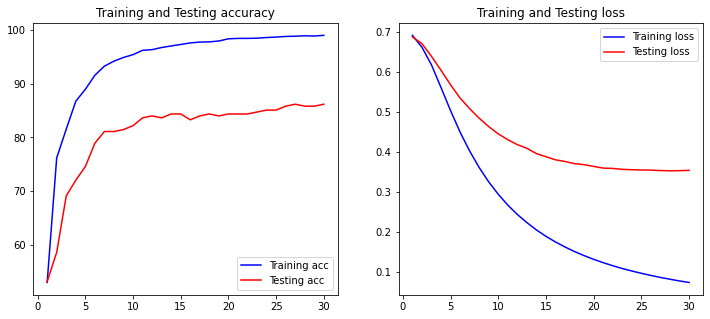

Training Accuracy: 0.9911
Testing Accuracy:  0.8618
Accuracy = 86.18%
AUC      = 0.85921
F1       = 0.84298
[[135  18]
 [ 20 102]]




In [7]:
# Print statistics
plot_history(score)


loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


# Predictions of the classification model
pred = model.predict(testX)

# Evaluation of the classification model
evaluate_model(testY, pred)

# Case study II: Sentinel model (**with** data preprocessing)

## Preprocess data
1. Lower case
2. Remove punctuation
2. Remove stopping words
3. Lemmatization (or Stemming)

In [8]:
Sentences_train = preprocess(Series=Sentences_train, verbose=False)
Sentences_test = preprocess(Series=Sentences_test, verbose=False)

In [9]:
# Vectorization process
vectorizer = CountVectorizer(min_df=2, max_df=0.9, stop_words=None, ngram_range=(1,1))
vectorizer.fit(Sentences_train)

trainX = vectorizer.transform(Sentences_train).toarray()
testX  = vectorizer.transform(Sentences_test).toarray()

print('Vocabulary size: ', len(vectorizer.vocabulary_))

Vocabulary size:  1837


## Setup model & train

In [10]:
# Setup model
model = Sequential()
model.add(Dense(20, input_dim=trainX.shape[1], activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=5e-4), metrics = ['accuracy'])
model.summary()


# Train model
score = model.fit(trainX, trainY,
                  epochs          = 30, 
                  batch_size      = 64, 
                  verbose         = 1, 
                  validation_data = (testX, testY))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                36760     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 36,781
Trainable params: 36,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
39/39 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.5710 - val_loss: 0.6884 - val_accuracy: 0.5345
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7036 - val_loss: 0.6785 - val_accuracy: 0.6182
Epoch 3/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.7885 - val_loss: 0.6627 - val_accuracy: 0.6836
Epoch 4/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0

## Model evaluation

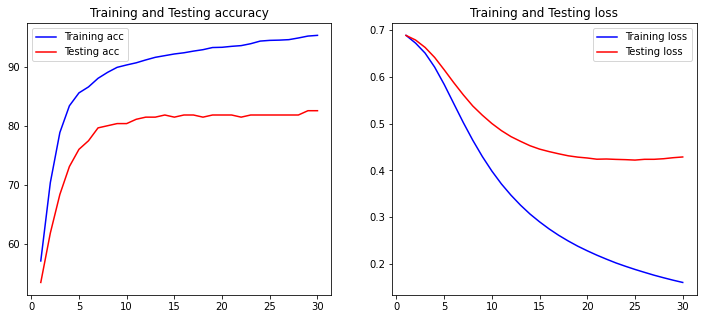

Training Accuracy: 0.9563
Testing Accuracy:  0.8255
Accuracy = 82.55%
AUC      = 0.82487
F1       = 0.80645
[[127  26]
 [ 22 100]]




In [11]:
# Print statistics
plot_history(score)


loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


# Predictions of the classification model
pred = model.predict(testX)

# Evaluation of the classification model
evaluate_model(testY, pred)